<a href="https://colab.research.google.com/github/mohripan/Machine-Learning/blob/main/CNNPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
from torch import optim

In [24]:
class CNN(nn.Module):
  def __init__(self, in_channels = 1, num_classes = 10):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(16*7*7, num_classes)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = self.pool(X)
    X = F.relu(self.conv2(X))
    X = self.pool(X)
    X = self.flatten(X)
    X = self.fc1(X)

    return X

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [26]:
model = CNN().to(device)

In [27]:
num_epochs = 10
learning_rate = 0.001
batch_size = 32
in_channels = 1

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [29]:
train_dataset = datasets.MNIST(root='dataset/', transform=transforms.ToTensor(), train=True, download=True)
test_dataset = datasets.MNIST(root='dataset/', transform=transforms.ToTensor(), train=False, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [30]:
train_losses = np.zeros(num_epochs)
test_losses = np.zeros(num_epochs)

acc = 0
val_acc = 0

for i in range(num_epochs):
  train_loss = []

  num_correct = 0
  num_samples = 0
  model.eval()

  for batch_idx, (data, targets) in enumerate(train_loader):
    optimizer.zero_grad()

    data, targets = data.to(device), targets.to(device)

    score = model(data)
    loss = criterion(score, targets)

    _, predictions = score.max(1)
    num_correct += (predictions == targets).sum()
    num_samples += predictions.size(0)

    train_loss.append(loss.item())

    loss.backward()
    optimizer.step()

  train_loss = np.mean(train_loss)
  acc = float(num_correct)/float(num_samples)

  test_loss = []

  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for batch_idx, (data, targets) in enumerate(test_loader):
      data, targets = data.to(device), targets.to(device)

      score = model(data)
      loss = criterion(score, targets)

      test_loss.append(loss.item())

      _, predictions = score.max(1)
      num_correct += (predictions == targets).sum()
      num_samples += predictions.size(0)

    val_acc = float(num_correct)/float(num_samples)
    test_loss = np.mean(test_loss)

  train_losses[i] = train_loss
  test_losses[i] = test_loss

  print(f'Epochs: {i+1}/{num_epochs}, train loss: {train_loss}, acc: {acc}, test loss: {test_loss}, val_acc: {val_acc}')

Epochs: 1/10, train loss: 0.2555241099320352, acc: 0.92355, test loss: 0.08202963018884359, val_acc: 0.9727
Epochs: 2/10, train loss: 0.08051386784818024, acc: 0.97615, test loss: 0.06635032944905106, val_acc: 0.9765
Epochs: 3/10, train loss: 0.062717707460622, acc: 0.9808833333333333, test loss: 0.05217995121442793, val_acc: 0.9823
Epochs: 4/10, train loss: 0.052443864489160476, acc: 0.98395, test loss: 0.04951922225652165, val_acc: 0.9839
Epochs: 5/10, train loss: 0.04584963718632547, acc: 0.98585, test loss: 0.05033429055231082, val_acc: 0.9836
Epochs: 6/10, train loss: 0.04005592383067123, acc: 0.9876666666666667, test loss: 0.04420887988067733, val_acc: 0.9856
Epochs: 7/10, train loss: 0.035790157899524395, acc: 0.9889166666666667, test loss: 0.04628254185379007, val_acc: 0.9842
Epochs: 8/10, train loss: 0.032641834849080384, acc: 0.98975, test loss: 0.04601999362865044, val_acc: 0.9845
Epochs: 9/10, train loss: 0.029270561724687772, acc: 0.99105, test loss: 0.04956345449080198, v

In [32]:
import matplotlib.pyplot as plt

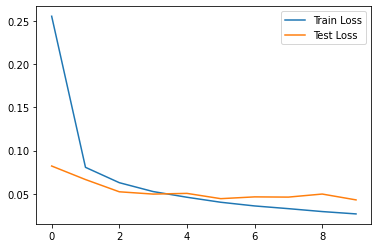

In [33]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()